# Import da Bibliotecas

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Carregando o Dataset

In [48]:
df = pd.read_csv('synthetic_flood_data.csv')

In [49]:
df.head()

,location_id,latitude,longitude,flood_severity,population_density,avg_income,predominant_household_type,demand_hygiene,demand_clothing,demand_food,nearest_dist_point_id,dist_point_latitude,dist_point_longitude,distance_to_point_km,point_capacity_hygiene,point_capacity_clothing,point_capacity_food,accessibility_score
0,LOC_6468c348,-23.691534,-46.549257,2,931.52,1977.28,Casal,5,3,4,DP_e82396bc,-23.654766,-46.547772,4.08,2,7,8,6
1,LOC_4f4394b0,-23.577696,-46.514305,3,1253.15,2118.22,Casal,6,4,6,DP_d8b2af58,-23.608167,-46.539444,4.24,7,4,3,5
2,LOC_64a95ec7,-23.613025,-46.717955,2,1927.12,1954.28,Família com Crianças,2,3,5,DP_105d35a6,-23.603585,-46.702236,1.91,8,9,4,8
3,LOC_c043922c,-23.652103,-46.760923,1,927.66,500.00,Família com Crianças,3,1,2,DP_3fa9402c,-23.643582,-46.795433,3.63,7,5,6,8
4,LOC_ebb29c2a,-23.562421,-46.739868,3,4130.17,1286.86,Adulto Sozinho,7,4,1,DP_3995de33,-23.576313,-46.745390,1.64,8,2,7,7


# Análise Exploratória

## Informações Básicas

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location_id                 500 non-null    object 
 1   latitude                    500 non-null    float64
 2   longitude                   500 non-null    float64
 3   flood_severity              500 non-null    int64  
 4   population_density          500 non-null    float64
 5   avg_income                  500 non-null    float64
 6   predominant_household_type  500 non-null    object 
 7   demand_hygiene              500 non-null    int64  
 8   demand_clothing             500 non-null    int64  
 9   demand_food                 500 non-null    int64  
 10  nearest_dist_point_id       500 non-null    object 
 11  dist_point_latitude         500 non-null    float64
 12  dist_point_longitude        500 non-null    float64
 13  distance_to_point_km        500 non

## Verificação de Valores Nulos

In [51]:
df.isnull().sum()

location_id                   0
latitude                      0
longitude                     0
flood_severity                0
population_density            0
avg_income                    0
predominant_household_type    0
demand_hygiene                0
demand_clothing               0
demand_food                   0
nearest_dist_point_id         0
dist_point_latitude           0
dist_point_longitude          0
distance_to_point_km          0
point_capacity_hygiene        0
point_capacity_clothing       0
point_capacity_food           0
accessibility_score           0
dtype: int64

## Estatísticas Descritivas (Numéricas)

In [52]:
df.describe()

,latitude,longitude,flood_severity,population_density,avg_income,demand_hygiene,demand_clothing,demand_food,dist_point_latitude,dist_point_longitude,distance_to_point_km,point_capacity_hygiene,point_capacity_clothing,point_capacity_food,accessibility_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-23.547899,-46.648895,2.576000,1435.48026,2702.145880,4.942000,4.930000,4.638000,-23.545560,-46.649489,2.301440,5.100000,5.938000,5.490000,6.320000
std,0.084196,0.085611,0.941274,1344.33632,1827.402588,2.024558,2.482221,2.416326,0.077688,0.084028,1.291408,2.859082,2.780219,2.967746,1.764036
min,-23.699525,-46.799895,1.000000,130.33000,500.000000,1.000000,1.000000,1.000000,-23.692287,-46.799220,0.080000,1.000000,1.000000,1.000000,1.000000
25%,-23.617981,-46.719023,2.000000,592.63750,1296.952500,3.000000,3.000000,3.000000,-23.622197,-46.714927,1.390000,3.000000,4.000000,3.000000,5.000000
50%,-23.546073,-46.652208,3.000000,1005.79000,2287.905000,5.000000,5.000000,4.000000,-23.543480,-46.653110,2.095000,4.000000,6.000000,6.000000,6.000000
75%,-23.478148,-46.573192,3.000000,1795.92500,3728.190000,6.000000,7.000000,7.000000,-23.481401,-46.579277,3.012500,8.000000,8.000000,8.000000,7.000000
max,-23.400146,-46.500463,4.000000,10102.86000,12247.360000,10.000000,10.000000,10.000000,-23.404291,-46.509874,7.620000,10.000000,10.000000,10.000000,10.000000


## Estatísticas Descritivas (Categóricas)

In [53]:
df.describe(include=['object'])

,location_id,predominant_household_type,nearest_dist_point_id
count,500,500,500
unique,500,4,50
top,LOC_6468c348,Família com Crianças,DP_92787c0a
freq,1,208,30


## Plotando Gráficos

In [54]:
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()

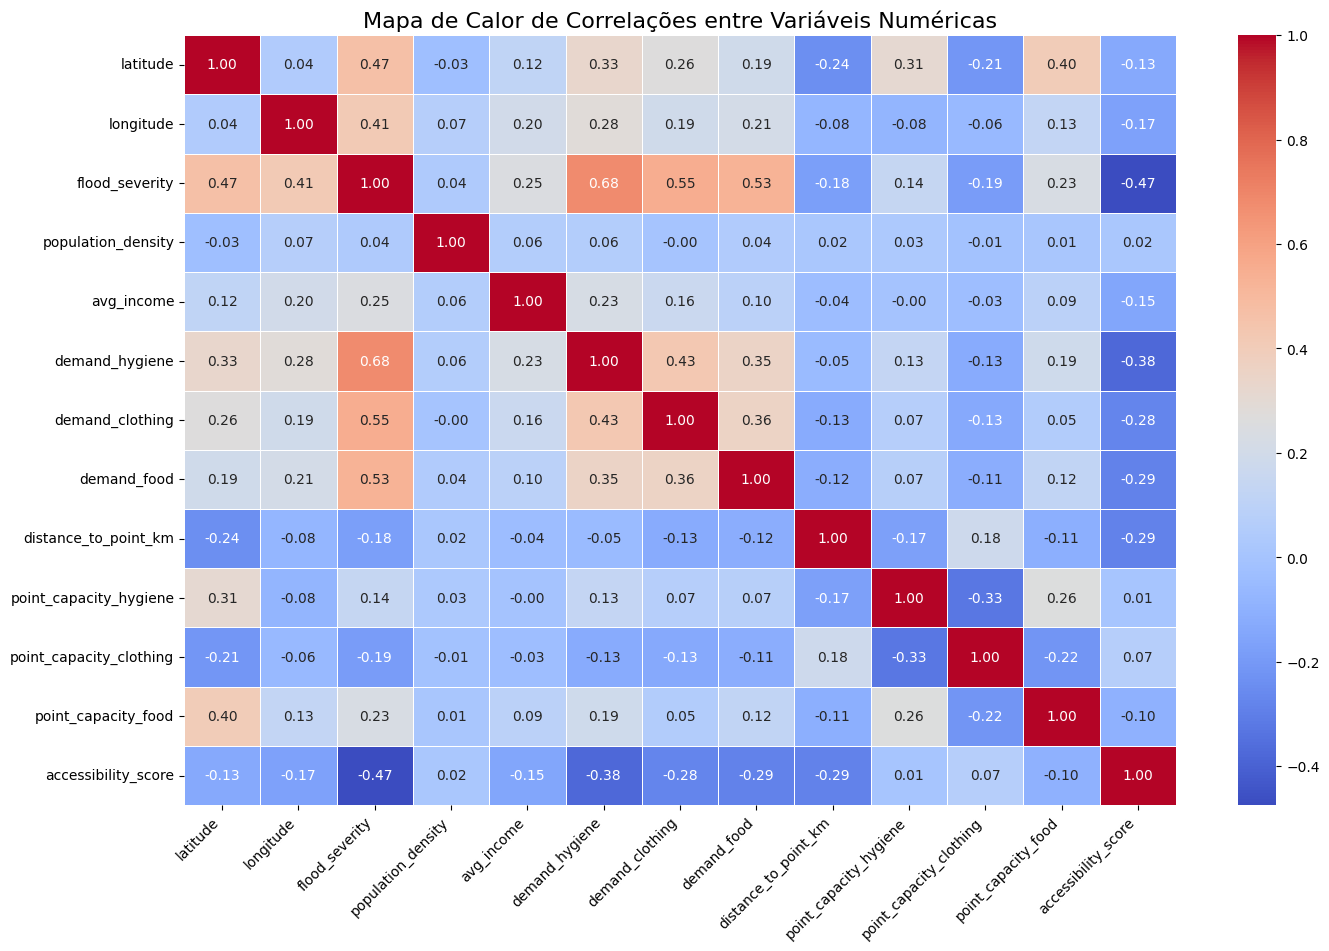

In [55]:
plt.figure(figsize=(16, 10))
corr_cols = [col for col in colunas_numericas if col not in ['dist_point_latitude', 'dist_point_longitude']]
correlation_matrix = df[corr_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlações entre Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Training

Após essa análise exploratória, decidimos que a coluna alvo será o 'total de demanda'. Então precisamos criar essa coluna somando as demandas de higiene, roupa e comida.

In [56]:
df['total_demand'] = df['demand_hygiene'] + df['demand_clothing'] + df['demand_food']

Também entendemos que para nosso caso de uso não faz sentido IDs, lat/lon, demandas individuais e capacidades do ponto (foco na previsão da demanda da localidade)

In [57]:
features = [
    'flood_severity',
    'population_density',
    'avg_income',
    'predominant_household_type',
    'distance_to_point_km',
    'accessibility_score'
]

target = 'total_demand'

print(f"Features selecionadas: {features}")
print(f"Target selecionado: {target}")

Features selecionadas: ['flood_severity', 'population_density', 'avg_income', 'predominant_household_type', 'distance_to_point_km', 'accessibility_score']
Target selecionado: total_demand


In [58]:
x = df[features]
y = df[target]

In [59]:
numeric_features = x.select_dtypes(include=np.number).columns
categorical_features = x.select_dtypes(include=['object']).columns


In [60]:
scaler_standard = StandardScaler()

x = scaler_standard.fit_transform(x[numeric_features])

In [62]:
label_encoder = LabelEncoder()

for coluna in categorical_features:
    print(coluna)
    x[coluna] = label_encoder.fit_transform(x[coluna])

location_id


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)